### Preparing for time comparison

In [5]:
from time import time, sleep

start_time = time()

# Python code here
sleep(1)

end_time = time()

time_spent = end_time - start_time

print(time_spent)

import os
import psutil
 
# inner psutil function
def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
 
# decorator function
def profile(func):
    def wrapper(*args, **kwargs):
        mem_before = process_memory()
        result = func(*args, **kwargs)
        mem_after = process_memory()
        print("{}:consumed memory: {} MB".format(
            func.__name__,
            (mem_after - mem_before) / (1024 ** 2))) 
        return result
    return wrapper

4.8160552978515625e-05


### Preparing for memory usage comparison

In [ ]:
import os
import psutil
 
# inner psutil function
def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
 
# decorator function
def profile(func):
    def wrapper(*args, **kwargs):
        mem_before = process_memory()
        result = func(*args, **kwargs)
        mem_after = process_memory()
        print("{}:consumed memory: {} MB".format(
            func.__name__,
            (mem_after - mem_before) / (1024 ** 2))) 
        return result
    return wrapper
 
# instantiation of decorator function
@profile
# main code for which memory has to be monitored
def run_fastqc():
#     x = [1] * (10 ** 7)
    y = [2] * (4 * 10 ** 8)
#     del x
#     return y
 
run_fastqc()

### 0. File manipulations

In [9]:
import os
path_to_data = '/home/carlosseiya/bioinfo/data/'
os.listdir(path_to_data)
# os.listdir()
# print(os.listdir(f'{path_to_data}/bowtie2_index'))
# print(os.listdir(f'{path_to_data}/bowtie2_mapped'))

['chip_2_1.fq.bz2',
 'bowtie2_index',
 'filtered_gene_bc_matrices',
 'deseq_results.csv',
 'Homo_sapiens.GRCh38.105.gtf',
 'hg19sub.fa.fai',
 'count_table.csv',
 'chip_1_1.fq.bz2',
 'align_txt.txt',
 'hg19sub.fa',
 'bowtie2_mapped']

- Deletar

In [4]:
import shutil
import os

path_to_data = '/home/carlosseiya/bioinfo/data/'

for filename in os.listdir(path_to_data):
    # if 'fastqc' in filename:
    # if '.html' in filename:
    # if 'trimmed' in filename:
    # if 'Qfiltered' in filename:
    # if 'processed' in filename:
    if 'bam' in filename:
    # if 'Rbowtie' in filename or 'md5' in filename or 'fai' in filename:
    # if 'qc_report' in filename:
    # if 'wig' in filename:
    # if '.fai' in filename:
        try:
            os.remove(f'{path_to_data}{filename}')
        except IsADirectoryError as e:
            shutil.rmtree(f'{path_to_data}{filename}')

In [6]:
for filename in os.listdir(f'{path_to_data}/bowtie2_index'):
    os.remove(f'{path_to_data}/bowtie2_index/{filename}')

In [7]:
for filename in os.listdir(f'{path_to_data}/bowtie2_mapped'):
    os.remove(f'{path_to_data}/bowtie2_mapped/{filename}')

In [81]:
for filename in os.listdir():
    if 'QuasR' in filename:
        os.remove(filename)

### Quality Control
- FastQC: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/

In [3]:
import subprocess
import os
from time import time

path_to_data = '/home/carlosseiya/bioinfo/data/'
all_files_in_data = os.listdir(path_to_data)
# print(all_files_in_data)

In [3]:
start_time = time()

for filename in all_files_in_data:
    if '.fq' in filename:
        subprocess.run(['fastqc', f'{path_to_data}{filename}', '-o', path_to_data])
        
end_time = time()

time_spent = end_time - start_time
print(time_spent)

application/bz2


Started analysis of chip_2_1.fq.bz2
Approx 95% complete for chip_2_1.fq.bz2


Analysis complete for chip_2_1.fq.bz2
application/bz2


Started analysis of chip_1_1.fq.bz2
Approx 95% complete for chip_1_1.fq.bz2


Analysis complete for chip_1_1.fq.bz2
5.910331726074219


### Trimming
- Cutadapt: https://cutadapt.readthedocs.io/en/stable/index.html

In [2]:
import subprocess
import os
from time import time

path_to_data = '/home/carlosseiya/bioinfo/data/'
all_files_in_data = os.listdir(path_to_data)

In [3]:
start_time = time()

for filename in all_files_in_data:
    try:
        if '.fq' in filename:
            input_path = f'{path_to_data}{filename}'
            output_path = f"{path_to_data}{filename.split('.')[0] + '_Qfiltered_Python.fq.bz2'}"
            # print(input_path, output_path)
            
            # quality trimming
            subprocess.run(['cutadapt',  '--quality-cutoff', '20', '--output', output_path, input_path])
            
    except subprocess.CalledProcessError as e:
        print(f'Error: {e}')

end_time = time()

time_spent = end_time - start_time
print(time_spent)

This is cutadapt 4.5 with Python 3.11.6
Command line parameters: --quality-cutoff 20 --output /home/carlosseiya/bioinfo/data/chip_2_1_Qfiltered_Python.fq.bz2 /home/carlosseiya/bioinfo/data/chip_2_1.fq.bz2
Processing single-end reads on 1 core ...
Finished in 0.064 s (15.461 µs/read; 3.88 M reads/minute).

=== Summary ===

Total reads processed:                   4,114
Reads written (passing filters):         4,114 (100.0%)

Total basepairs processed:       148,104 bp
Quality-trimmed:                  33,470 bp (22.6%)
Total written (filtered):        114,634 bp (77.4%)
This is cutadapt 4.5 with Python 3.11.6
Command line parameters: --quality-cutoff 20 --output /home/carlosseiya/bioinfo/data/chip_1_1_Qfiltered_Python.fq.bz2 /home/carlosseiya/bioinfo/data/chip_1_1.fq.bz2
Processing single-end reads on 1 core ...
Finished in 0.062 s (23.756 µs/read; 2.53 M reads/minute).

=== Summary ===

Total reads processed:                   2,597
Reads written (passing filters):         2,597 (100.0

- chip_1_1.fq.bz2: 12,276 bp
- chip_2_1.fq.bz2: 33,470 bp

### Filtering
- Cutadapt: https://cutadapt.readthedocs.io/en/stable/index.html

In [4]:
import subprocess
import os

all_files_in_data = os.listdir(path_to_data)

In [4]:
# filtering
start_time = time()

for filename in all_files_in_data:
    try:
        if '.fq' in filename:
            input_path = f'{path_to_data}{filename}'
            output_path = f"{path_to_data}{filename.split('.')[0] + '_processed_Python.fastq'}"
            # print(input_path, output_path)
            
            subprocess.run(['cutadapt', '--max-n', '1', '--cut', '-3', '--minimum-length', '10',
                            '--output', output_path, input_path])
            
    except subprocess.CalledProcessError as e:
        print(f'Error: {e}')
        
end_time = time()

time_spent = end_time - start_time
print(time_spent)

This is cutadapt 4.5 with Python 3.11.6
Command line parameters: --max-n 1 --cut -3 --minimum-length 10 --output /home/carlosseiya/bioinfo/data/chip_2_1_processed_Python.fastq /home/carlosseiya/bioinfo/data/chip_2_1.fq.bz2
Processing single-end reads on 1 core ...
Finished in 0.029 s (7.086 µs/read; 8.47 M reads/minute).

=== Summary ===

Total reads processed:                   4,114

== Read fate breakdown ==
Reads that were too short:                   0 (0.0%)
Reads with too many N:                       9 (0.2%)
Reads written (passing filters):         4,105 (99.8%)

Total basepairs processed:       148,104 bp
Total written (filtered):        135,465 bp (91.5%)
This is cutadapt 4.5 with Python 3.11.6
Command line parameters: --max-n 1 --cut -3 --minimum-length 10 --output /home/carlosseiya/bioinfo/data/chip_1_1_processed_Python.fastq /home/carlosseiya/bioinfo/data/chip_1_1.fq.bz2
Processing single-end reads on 1 core ...
Finished in 0.020 s (7.575 µs/read; 7.92 M reads/minute).

=

- chip_1_1: Reads written: 2597 (0 out)
- chip_2_1: Reads written: 4105 (9 out)

### Alignment / Mapping
- Bowtie: https://bowtie-bio.sourceforge.net/manual.shtml
- Download: https://github.com/BenLangmead/bowtie

In [7]:
import subprocess
import os

bowtie2_index_path = f'{path_to_data}/bowtie2_index'
bowtie2_mapped_path = f'{path_to_data}/bowtie2_mapped'

## preparing file paths
try:
    os.mkdir(bowtie2_index_path)
    os.mkdir(bowtie2_mapped_path)
except FileExistsError as e:
    print(e)

[Errno 17] File exists: '/home/carlosseiya/bioinfo/data//bowtie2_index'


In [8]:
start_time = time()

try:
    # indexing the reference genome with Bowtie2 for alignment
    subprocess.run(['bowtie2-build', f'{path_to_data}/hg19sub.fa', f'{bowtie2_index_path}/hg19sub'])
    
    # indexing the reference genome with Samtools for manipulation of alignment file
    subprocess.run(['samtools', 'faidx', f'{path_to_data}/hg19sub.fa'])

    # running bowtie
    subprocess.run(['bowtie2', '-x', f'{bowtie2_index_path}/hg19sub', '-U', f'{path_to_data}/chip_1_1.fq.bz2', '-S', \
                    f'{bowtie2_mapped_path}/chip_1_1.sam'])
    subprocess.run(['bowtie2', '-x', f'{bowtie2_index_path}/hg19sub', '-U', f'{path_to_data}/chip_2_1.fq.bz2', '-S', \
                    f'{bowtie2_mapped_path}/chip_2_1.sam'])

    # converting sam to bam format
    subprocess.run(['samtools', 'view', '-b', '-o', f'{bowtie2_mapped_path}/chip_1_1.bam', f'{bowtie2_mapped_path}/chip_1_1.sam'])
    subprocess.run(['samtools', 'view', '-b', '-o', f'{bowtie2_mapped_path}/chip_2_1.bam', f'{bowtie2_mapped_path}/chip_2_1.sam'])
    
    # sorting the bam file
    subprocess.run(['samtools', 'sort', '-o', f'{bowtie2_mapped_path}/chip_1_1.sorted.bam', f'{bowtie2_mapped_path}/chip_1_1.bam'])
    subprocess.run(['samtools', 'sort', '-o', f'{bowtie2_mapped_path}/chip_2_1.sorted.bam', f'{bowtie2_mapped_path}/chip_2_1.bam'])
    
    # index the bam file
    subprocess.run(['samtools', 'index', f'{bowtie2_mapped_path}/chip_1_1.sorted.bam'])
    subprocess.run(['samtools', 'index', f'{bowtie2_mapped_path}/chip_2_1.sorted.bam'])

    # getting statistics
    subprocess.run(['samtools', 'flagstat', f'{bowtie2_mapped_path}/chip_1_1.bam'])
    subprocess.run(['samtools', 'flagstat', f'{bowtie2_mapped_path}/chip_2_1.bam'])
except subprocess.CalledProcessError as e:
    print(f'Error: {e}')
       
end_time = time()

time_spent = end_time - start_time
print(time_spent)

Settings:
  Output files: "/home/carlosseiya/bioinfo/data//bowtie2_index/hg19sub.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /home/carlosseiya/bioinfo/data//hg19sub.fa
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 23750
Using parameters --bmax 17813 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 1

Building a SMALL index


  bucket 3: 20%
  bucket 3: 30%
  bucket 3: 40%
  bucket 3: 50%
  bucket 3: 60%
  bucket 3: 70%
  bucket 3: 80%
  bucket 3: 90%
  bucket 3: 100%
  Sorting block of length 9969 for bucket 3
  (Using difference cover)
  Sorting block time: 00:00:00
Returning block of 9970 for bucket 3
Getting block 4 of 7
  Reserving size (17813) for bucket 4
  Calculating Z arrays for bucket 4
  Entering block accumulator loop for bucket 4:
  bucket 4: 10%
  bucket 4: 20%
  bucket 4: 30%
  bucket 4: 40%
  bucket 4: 50%
  bucket 4: 60%
  bucket 4: 70%
  bucket 4: 80%
  bucket 4: 90%
  bucket 4: 100%
  Sorting block of length 15230 for bucket 4
  (Using difference cover)
  Sorting block time: 00:00:00
Returning block of 15231 for bucket 4
Getting block 5 of 7
  Reserving size (17813) for bucket 5
  Calculating Z arrays for bucket 5
  Entering block accumulator loop for bucket 5:
  bucket 5: 10%
  bucket 5: 20%
  bucket 5: 30%
  bucket 5: 40%
  bucket 5: 50%
  bucket 5: 60%
  bucket 5: 70%
  bucket 5: 80%


2597 reads; of these:
  2597 (100.00%) were unpaired; of these:
    620 (23.87%) aligned 0 times
    1970 (75.86%) aligned exactly 1 time
    7 (0.27%) aligned >1 times
76.13% overall alignment rate
4114 reads; of these:
  4114 (100.00%) were unpaired; of these:
    1215 (29.53%) aligned 0 times
    2891 (70.27%) aligned exactly 1 time
    8 (0.19%) aligned >1 times
70.47% overall alignment rate


2597 + 0 in total (QC-passed reads + QC-failed reads)
2597 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
1977 + 0 mapped (76.13% : N/A)
1977 + 0 primary mapped (76.13% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
4114 + 0 in total (QC-passed reads + QC-failed reads)
4114 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
2899 + 0 mapped (70.47% : N/A)
2899 + 0 primary mapped (70.47% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
5.707472324371338


### RNASeq

In [ ]:
# loading libraries
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import seaborn as sns
from sanbomics.tools import id_map # convert EnsemblID to gene symbol
from sanbomics.plots import volcano # plotting

In [ ]:
# !pip install pydeseq2
# !pip install sanbomics
# !pip install scanpy
# !pip install gseapy

#### DEG (Differentially Expressed Genes) Analysis
- PyDESeq2: https://academic.oup.com/bioinformatics/article/39/9/btad547/7260507

In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd

In [4]:
start_time = time()

# data importing
counts = pd.read_csv('~/bioinfo/data/count_table.csv')

# data preprocessing
counts = counts.set_index('Geneid')
counts = counts[counts.sum(axis=1) > 0]
counts = counts.T

# simple visualization
# counts.head(10)

# setting metadata
metadata = pd.DataFrame(zip(counts.index, ['C', 'C', 'C', 'C', 'RS', 'RS', 'RS', 'RS']), columns=['Sample', 'Condition'])
metadata = metadata.set_index('Sample')

# running deseq
dds = DeseqDataSet(counts = counts,
             metadata = metadata,
             design_factors = 'Condition')
dds.deseq2()

# getting results from deseq
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition', 'RS', 'C'))
stat_res.summary()
res = stat_res.results_df
# res

## post-results processing and filtering

# removing na
res = res.dropna()

# filtering
res = res[res['baseMean'] >= 10]
sigs = res[(res['padj'] < 0.05) & (abs(res['log2FoldChange']) > 0.5)]
display(sigs)

end_time = time()

time_spent = end_time - start_time
print(time_spent)

Fitting size factors...
... done in 3.61 seconds.

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Fitting dispersions...
... done in 28.47 seconds.

Fitting dispersion trend curve...
... done in 211.91 seconds.

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/anndata/_core/views.py:144: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/pydeseq2/utils.py:674: RuntimeWarning: invalid value encountered in log
  log_alpha_hat = np.log(alpha_hat)
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/pydeseq2/utils.py:715: RuntimeWarning: invalid value encountered i

Log2 fold change & Wald test p-value: Condition RS vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132
ENSG00000260179,0.758697,-1.637766,1.558991,-1.050529,0.293475,NaN
...,...,...,...,...,...,...
ENSG00000278817,0.352622,1.119898,1.744744,0.641870,0.520958,NaN
ENSG00000278384,3.791022,-0.243724,0.662745,-0.367750,0.713060,0.894836
ENSG00000276345,4.833929,-0.092388,3.260101,-0.028339,0.977392,0.993656


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000069424,231.438079,1.135128,0.276396,4.106888,4.010261e-05,1.342057e-03
ENSG00000116254,16.685968,2.713808,0.659952,4.112128,3.920295e-05,1.322754e-03
ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,3.591674e-05,1.239615e-03
ENSG00000198830,1111.179223,-1.207821,0.352071,-3.430615,6.022151e-04,1.041796e-02
ENSG00000060688,363.794327,-0.623651,0.093196,-6.691831,2.203960e-11,1.138621e-08
...,...,...,...,...,...,...
ENSG00000160298,76.683762,-1.196214,0.364446,-3.282282,1.029704e-03,1.558889e-02
ENSG00000159055,123.457054,-0.951653,0.321382,-2.961125,3.065174e-03,3.518990e-02
ENSG00000160193,135.509940,-0.712941,0.252288,-2.825895,4.714878e-03,4.787860e-02


950.0564796924591


In [8]:
# exporting results
# sigs.to_csv('~/bioinfo/data/deseq_results.csv')

#### Plotting

##### PCA Plot (For DDS)

In [5]:
import scanpy as sc

In [ ]:
sc.tl.pca(dds)

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


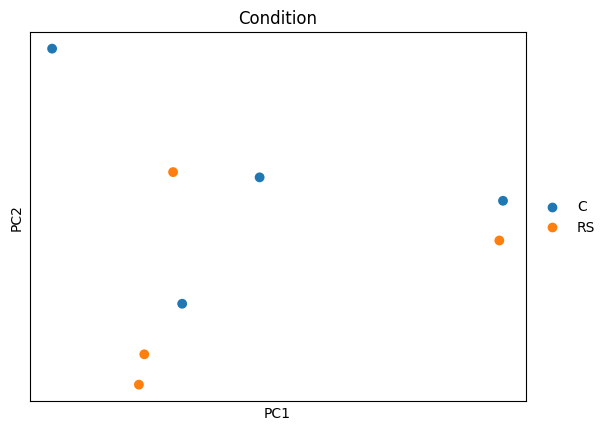

0.1762981414794922


In [11]:
start_time = time()

sc.pl.pca(dds, color='Condition', size=200)

end_time = time()

time_spent = end_time - start_time
print(time_spent)

##### Heatmap (For DDS)

In [ ]:
import seaborn as sns

In [12]:
# normalizing for heatmap
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

dds_sigs = dds[:, sigs.index]

grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names,
                       columns=dds_sigs.obs_names)
grapher.head(10)

Sample,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000069424,4.936712,5.330497,4.657737,4.881292,5.884856,5.632749,5.510250,5.966816
ENSG00000116254,1.382572,2.156508,1.827748,0.972782,2.799189,2.984191,3.218689,4.074131
ENSG00000204138,5.775793,5.958079,5.992263,5.964323,5.421047,5.643882,5.480264,5.657593
ENSG00000198830,7.459547,6.732459,7.657243,7.323496,6.451550,6.820084,6.514647,6.143658
ENSG00000060688,6.051830,6.041412,6.170902,6.093031,5.662408,5.718528,5.555626,5.705824
ENSG00000134690,6.113142,5.755127,6.591908,6.175042,4.907814,5.078601,4.519230,4.012061
ENSG00000158008,2.480356,0.567636,2.702678,1.243561,2.682108,3.901780,4.563703,3.899196
ENSG00000092853,5.913941,5.609532,6.317716,6.223489,5.033686,4.965240,3.973377,3.249256
ENSG00000228436,2.192812,1.191579,1.827748,1.456424,2.903988,2.984191,2.984618,2.452402


0.4702746868133545


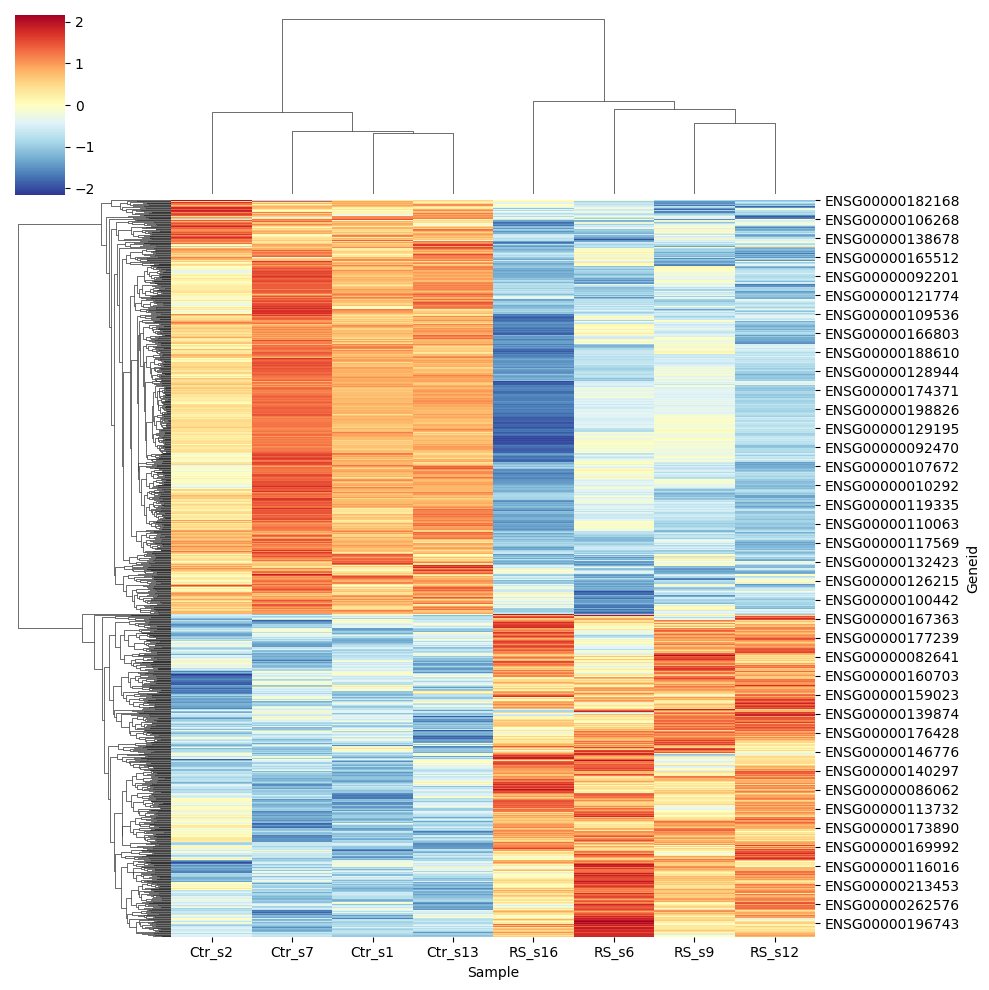

In [19]:
start_time = time()

sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')

end_time = time()

time_spent = end_time - start_time
print(time_spent)

##### Volcano Plot (For DDS)

In [9]:
from sanbomics.plots import volcano # plotting
from sanbomics.tools import id_map

In [10]:
res = res.reset_index()
# res_adj
mapper = id_map(species = 'human')
res['Symbol'] = res['Geneid'].map(mapper.mapper)

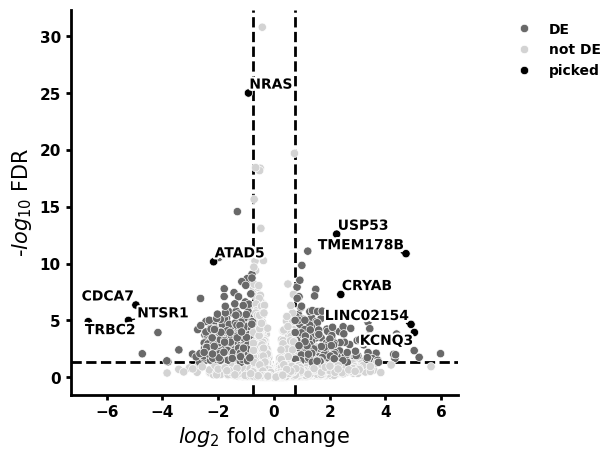

2.8355252742767334


In [11]:
start_time = time()

volcano(res, symbol="Symbol")

end_time = time()

time_spent = end_time - start_time
print(time_spent)

#### GSEA (Gene Set Enrichment Analysis)
- gseapy: https://academic.oup.com/bioinformatics/article/39/1/btac757/6847088

In [7]:
# loading libraries
import gseapy as gp
import numpy as np
from gseapy.plot import gseaplot
from sanbomics.tools import id_map

In [8]:
res = res.reset_index()
mapper = id_map(species = 'human')
res['Symbol'] = res['Geneid'].map(mapper.mapper)

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

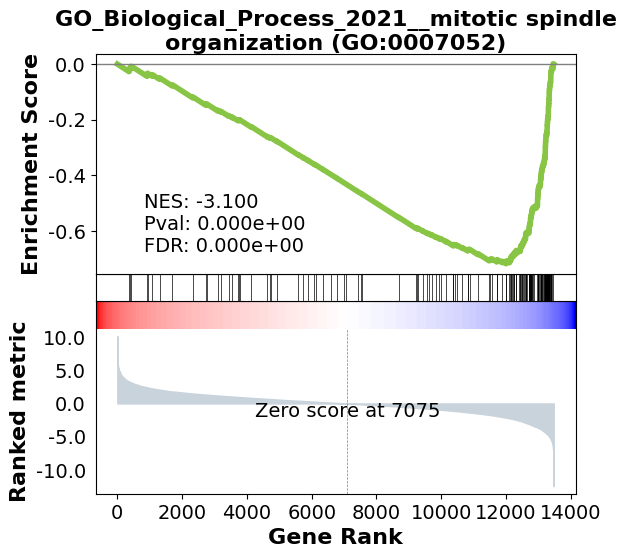

In [9]:
start_time = time()

# preparing data
res['Rank'] = -np.log10(res['padj']) * res['log2FoldChange']
res = res.sort_values('Rank', ascending=False)
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending=False)
ranking = ranking.drop_duplicates('Symbol')
# display(ranking)

# running GSEA
# gp.get_library_name() # to look at available libraries
manual_set = {'things': ['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6,
                     permutation_num = 100)
# print(pre_res)

# getting results in dataframe format
out = []

for term in list(pre_res.results):
    out.append([term,
                pre_res.results[term]['fdr'],
                pre_res.results[term]['es'],
                pre_res.results[term]['nes']])
    
out_df = pd.DataFrame(out, columns=['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop=True)
# display(out_df)

# plotting
# term_to_graph = out_df.sort_values('nes').iloc[0]['Term']
# term_to_graph

gseaplot(rank_metric = pre_res.ranking,
         term = 'GO_Biological_Process_2021__mitotic spindle organization (GO:0007052)',
         **pre_res.results['GO_Biological_Process_2021__mitotic spindle organization (GO:0007052)'])
         # , ofname = 'gsea_python.png')

# end_time = time()

# time_spent = end_time - start_time

# print(time_spent)

#### Single-cell RNASeq analysis
- scanpy: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1382-0
- Tutorial: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


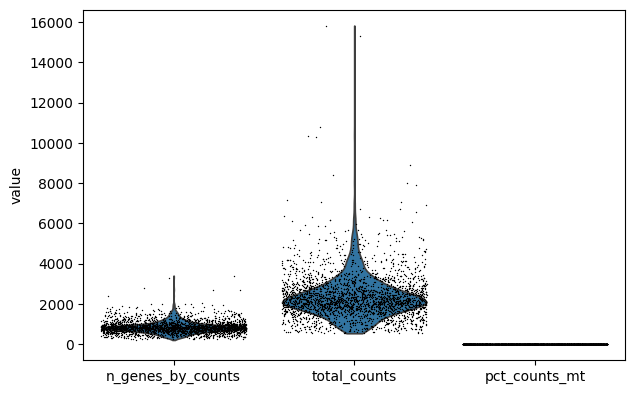

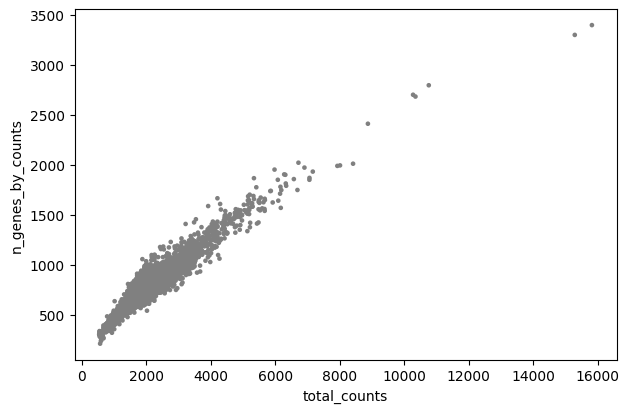

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:619: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if keys[0] in adata.obs_keys() and is_categorical_dtype(adata.obs[keys[0]]):


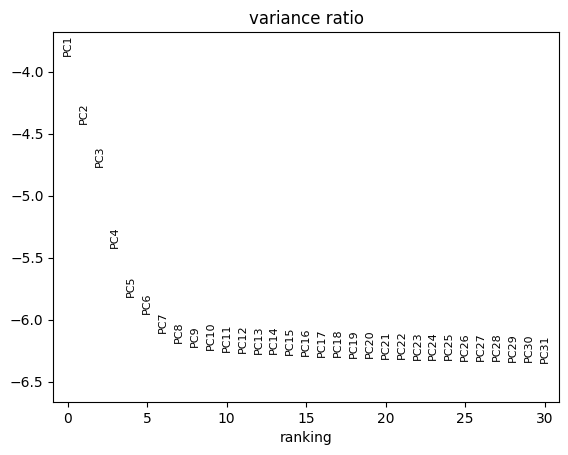

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


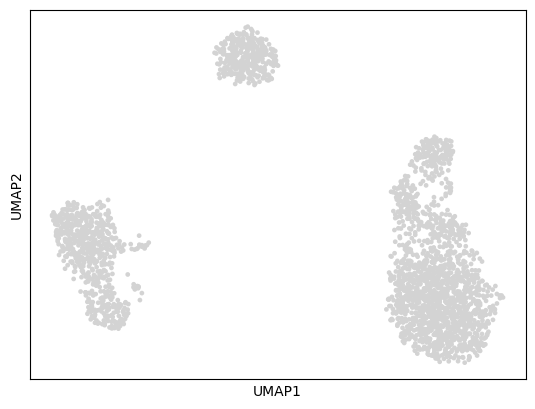

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


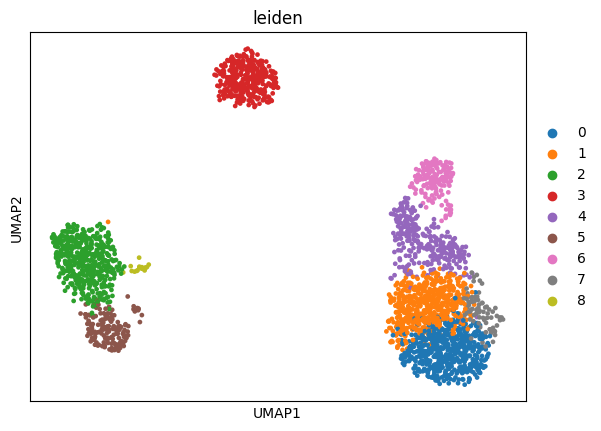

60.54498052597046


In [3]:
start_time = time()

# importing data
path_10x_mtx = '/home/carlosseiya/bioinfo/data/filtered_gene_bc_matrices/hg19/'
adata = sc.read_10x_mtx(path_10x_mtx, var_names='gene_symbols', cache=True)

# preprocessing
sc.pp.filter_cells(adata, min_genes = 200) # get rid of cells with fewer than 200 genes
sc.pp.filter_genes(adata, min_cells = 3) # get rid of genes that  are found in fewer than 3 cells

# quality control
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# visualizing for filtering
sc.pl.violin(adata, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)
# sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

# filtering
upper_lim = np.quantile(adata.obs['n_genes_by_counts'].values, .98)
lower_lim = np.quantile(adata.obs['n_genes_by_counts'].values, .02)
# print(f'{lower_lim} to {upper_lim}')
# adata = adata[adata.obs.n_genes_by_counts < 7000, :] # picking a number arbitrarily
adata = adata[(adata.obs['n_genes_by_counts'] < upper_lim) & (adata.obs['n_genes_by_counts'] > lower_lim)]
adata = adata[adata.obs['pct_counts_mt'] < 20]

# normalizing
sc.pp.normalize_total(adata, target_sum=1e4) # normalize every cell to 10,000 UMI
sc.pp.log1p(adata) # change to log counts

# highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) # default values
adata.raw = adata # save raw data before processing values and further filtering
adata[:, adata.var.highly_variable]

# regress out
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) # regress out effects of total counts per cell and the percent counts of mt

# scaling
sc.pp.scale(adata, max_value=10) # scale each gene to unit variance

# linear dimensionality reduction (PCA)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

# clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

# non-linear dimensionality reduction (UMAP)
sc.tl.umap(adata)
sc.pl.umap(adata)

# UMAP plotting
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

end_time = time()

time_spent = end_time - start_time
print(time_spent)

##### Find markers

In [27]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

/home/carlosseiya/miniconda3/envs/variantcalling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


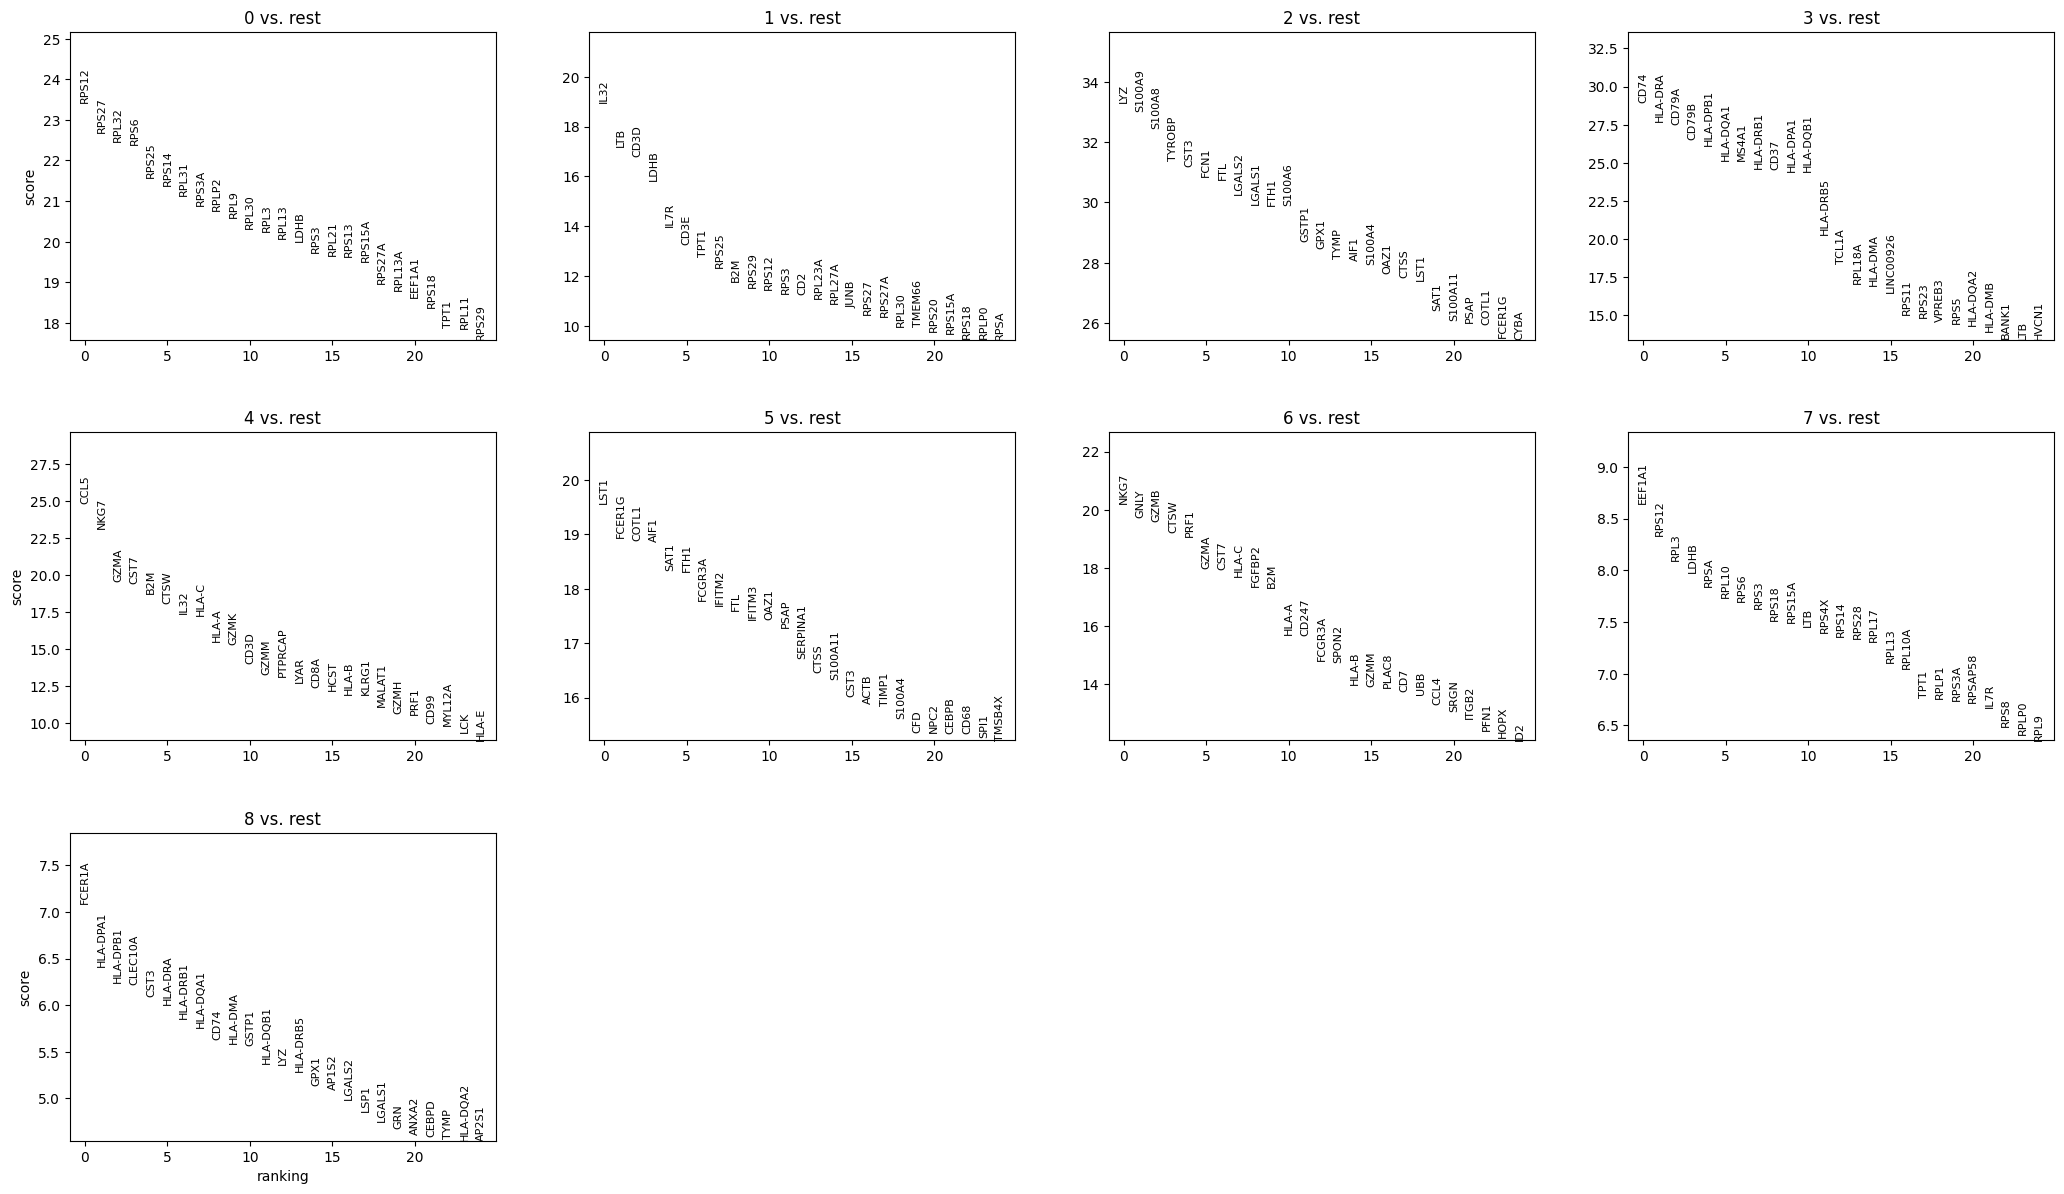

In [28]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [34]:
results = adata.uns['rank_genes_groups']

In [35]:
results['names']['0']

array(['RPS12', 'RPS27', 'RPL32', ..., 'S100A4', 'CD74', 'CYBA'],
      dtype=object)

In [36]:
out = np.array([[0,0,0,0,0]])

In [37]:
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))

In [41]:
markers = pd.DataFrame(out[1:], columns=['Gene', 'scores', 'pvals_adj', 'lfc', 'cluster'])

In [42]:
markers = markers[(markers['pvals_adj'] < 0.05) & (abs(markers['lfc']) > 1)]

In [44]:
markers[markers['cluster'] == '4']

,Gene,scores,pvals_adj,lfc,cluster
54856,CCL5,24.824808,0.0,5.687518,4
54857,NKG7,23.105415,0.0,5.323492,4
54858,GZMA,19.568544,0.0,4.32055,4
54859,CST7,19.44268,0.0,4.372667,4
54861,CTSW,18.103134,0.0,3.361699,4
...,...,...,...,...,...
68562,C1orf162,-8.96708,0.0,-2.677835,4
68563,AIF1,-9.060527,0.0,-3.394252,4
68564,CTSS,-9.064036,0.0,-2.015985,4
68567,HLA-DRA,-10.203364,0.0,-2.643692,4


### Convert Ensembl ID to Gene Symbol
1. Parsing the GTF File: http://ftp.ensembl.org/pub/release-105/gtf/homo_sapiens/
2. id_map()
- OBS: no native method. It needs to do the parsing of the GTF File

In [2]:
import pandas as pd
from sanbomics.tools import id_map

In [3]:
sigs = pd.read_csv('/home/carlosseiya/bioinfo/data/deseq_results.csv')
sigs.head(3)

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000069424,231.438079,1.135128,0.276396,4.106888,0.000040,0.001342
1,ENSG00000116254,16.685968,2.713808,0.659952,4.112128,0.000039,0.001323
2,ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,0.000036,0.001240


In [4]:
# 1. parsing the gtf file
start_time = time()
with open('/home/carlosseiya/bioinfo/data/Homo_sapiens.GRCh38.105.gtf') as f:
    gtf = list(f)

gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]
gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
gtf = list(set(gtf)) # only unique tuples
mapper_gtf = dict(gtf)
sigs['Symbol_GTF'] = sigs['Geneid'].map(mapper_gtf)
sigs.head(3)

end_time = time()

time_spent = end_time - start_time
print(time_spent)

22.88228487968445


In [4]:
# 2. id_map()
start_time = time()

mapper = id_map(species = 'human')
sigs['Symbol_Mapper'] = sigs['Geneid'].map(mapper.mapper)
sigs.head(3)

end_time = time()
time_spent = end_time - start_time
print(time_spent)

0.1237494945526123
